In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Load Dataset

raw_dataset = pd.read_csv('dataset.csv')
raw_dataset

,Substance,Time,Cumulative_added_PFAS,Feeding_period,Depuration_period,Liver,Blood,Skin,Muscle,Gills,Kidney,Carcass
0,PFBS,0,0.00000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,PFBS,168,31.89875,168,0,91.214502,60.777673,15.195500,12.137000,14.030454,3.836047,5.437985
2,PFBS,336,71.55525,336,0,98.107521,73.204916,12.476381,20.922965,12.476381,6.651405,3.593414
3,PFBS,672,174.14150,672,0,110.292895,31.797916,13.011294,7.331949,11.846248,3.254033,5.584379
4,PFBS,744,174.14150,0,72,30.799378,23.954987,4.730963,4.876848,4.148949,4.876848,2.110373
5,PFBS,840,174.14150,0,168,15.973046,6.944194,2.429386,1.556365,3.449056,3.740063,1.263831
6,PFBS,1008,174.14150,0,336,4.808616,2.769276,0.876076,0.584560,1.459108,1.167847,0.584814
7,PFBS,1344,174.14150,0,672,6.508065,1.847881,0.973333,1.410989,1.556874,1.410480,1.265104
8,PFHxS,0,0.00000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,PFHxS,168,31.89875,168,0,469.107551,241.800153,132.723112,15.255530,58.733791,35.087719,16.018307


In [4]:
raw_dataset = pd.get_dummies(raw_dataset, columns=['Substance'], prefix='', prefix_sep='')

In [5]:
raw_dataset

,Time,Cumulative_added_PFAS,Feeding_period,Depuration_period,Liver,Blood,Skin,Muscle,Gills,Kidney,Carcass,PFBS,PFHxS,PFNA,PFOA,PFOS
0,0,0.00000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0
1,168,31.89875,168,0,91.214502,60.777673,15.195500,12.137000,14.030454,3.836047,5.437985,1,0,0,0,0
2,336,71.55525,336,0,98.107521,73.204916,12.476381,20.922965,12.476381,6.651405,3.593414,1,0,0,0,0
3,672,174.14150,672,0,110.292895,31.797916,13.011294,7.331949,11.846248,3.254033,5.584379,1,0,0,0,0
4,744,174.14150,0,72,30.799378,23.954987,4.730963,4.876848,4.148949,4.876848,2.110373,1,0,0,0,0
5,840,174.14150,0,168,15.973046,6.944194,2.429386,1.556365,3.449056,3.740063,1.263831,1,0,0,0,0
6,1008,174.14150,0,336,4.808616,2.769276,0.876076,0.584560,1.459108,1.167847,0.584814,1,0,0,0,0
7,1344,174.14150,0,672,6.508065,1.847881,0.973333,1.410989,1.556874,1.410480,1.265104,1,0,0,0,0
8,0,0.00000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0
9,168,31.89875,168,0,469.107551,241.800153,132.723112,15.255530,58.733791,35.087719,16.018307,0,1,0,0,0


In [6]:
#Split input/output data

x_data = raw_dataset.copy()

In [7]:
# Remove the output variables from the x_data and keep them in y_data
output_variables = ['Liver', 'Blood', 'Skin', 'Muscle', 'Gills', 'Kidney', 'Carcass']
y_data = pd.DataFrame()
for col_name in output_variables:
    y_data[col_name] = x_data.pop(col_name)
y_data.head()

,Liver,Blood,Skin,Muscle,Gills,Kidney,Carcass
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,91.214502,60.777673,15.195500,12.137000,14.030454,3.836047,5.437985
2,98.107521,73.204916,12.476381,20.922965,12.476381,6.651405,3.593414
3,110.292895,31.797916,13.011294,7.331949,11.846248,3.254033,5.584379
4,30.799378,23.954987,4.730963,4.876848,4.148949,4.876848,2.110373


In [8]:
x_data

,Time,Cumulative_added_PFAS,Feeding_period,Depuration_period,PFBS,PFHxS,PFNA,PFOA,PFOS
0,0,0.00000,0,0,1,0,0,0,0
1,168,31.89875,168,0,1,0,0,0,0
2,336,71.55525,336,0,1,0,0,0,0
3,672,174.14150,672,0,1,0,0,0,0
4,744,174.14150,0,72,1,0,0,0,0
5,840,174.14150,0,168,1,0,0,0,0
6,1008,174.14150,0,336,1,0,0,0,0
7,1344,174.14150,0,672,1,0,0,0,0
8,0,0.00000,0,0,0,1,0,0,0
9,168,31.89875,168,0,0,1,0,0,0


In [56]:
def build_and_compile_model(neurons):
  model = keras.Sequential([
      layers.Normalization(axis=-1),
      layers.Dense(neurons, activation='relu'),
      layers.Dense(neurons, activation='relu'),
      layers.Dense(neurons, activation='relu'),
      layers.Dense(neurons, activation='relu'),
      layers.Dense(7)
  ])
  
  #model.build((None, 9))
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.legacy.Adam(0.001))
  return model

In [57]:
# Build the DNN model
dnn_model = build_and_compile_model(50)
#dnn_model.summary()

In [58]:
history = dnn_model.fit(x_data, 
                       y_data,
                       epochs=10000,
                       verbose=0)

In [53]:
dnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_26 (Dense)            (None, 100)               1000      
                                                                 
 dense_27 (Dense)            (None, 100)               10100     
                                                                 
 dense_28 (Dense)            (None, 7)                 707       
                                                                 
Total params: 11,826
Trainable params: 11,807
Non-trainable params: 19
_________________________________________________________________


In [59]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  #plt.ylim([0, 5])
  plt.yscale('log')  
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

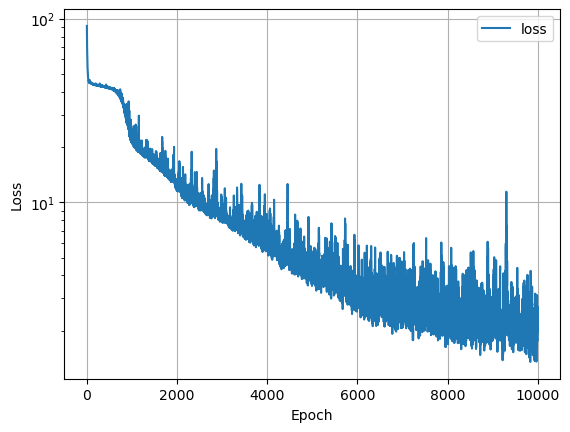

In [60]:
plot_loss(history)

In [61]:
y_pred = dnn_model.predict(x_data)

2/2 [==============================] - 0s 948us/step


In [62]:
y_pred

array([[  0.003,   0.038,   0.013,   0.006,   0.005,   0.01 ,   0.013],
       [ 89.363,  61.27 ,  14.966,  11.969,  14.947,   4.916,   5.21 ],
       [104.863,  70.477,  12.062,  12.399,  13.553,   8.614,   4.502],
       [112.344,  32.575,  14.168,   7.343,  15.024,  10.313,   5.506],
       [ 30.436,  26.196,   6.552,   4.11 ,   5.024,   6.54 ,   1.608],
       [ 15.886,   9.716,   2.509,   0.469,   4.291,   4.872,   1.058],
       [  5.576,   3.828,   0.978,   0.552,   2.9  ,   1.707,   0.702],
       [  6.135,   2.47 ,   0.251,   1.334,   2.326,  -0.146,   1.491],
       [  0.081,   0.088,   0.165,  -0.141,   0.298,   0.114,   0.004],
       [469.567, 245.416, 136.61 ,  14.519,  61.538,  40.206,  16.663],
       [686.164, 278.387, 104.166,  26.858,  59.415,  76.852,  13.264],
       [929.573, 629.756, 210.446,  32.027,  82.76 ,  62.03 ,  29.86 ],
       [719.722, 354.454, 123.506,  23.615,  61.751, 196.015,  19.718],
       [615.545, 236.713, 102.331,  19.306,  70.702, 294.233,  1